In [7]:
# 我们着重讨论不同区域的显著性影响因素
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("C:/Users/86187/Desktop/新加坡国立大学暑期学校相关文件/data_cleaned.csv")
data.describe()

Lng            Lat           Cid      followers  \
count  297597.000000  297597.000000  2.975970e+05  297597.000000   
mean      116.418767      39.949761  1.126275e+12       0.015039   
std         0.110999       0.091533  1.331619e+12       0.030417   
min       116.072514      39.627030  1.111030e+12       0.000000   
25%       116.345863      39.893200  1.111030e+12       0.000000   
50%       116.416780      39.934530  1.111030e+12       0.004374   
75%       116.476921      40.003156  1.111030e+12       0.016623   
max       116.711337      40.252758  1.184870e+14       1.000000   

               price     livingRoom    drawingRoom        kitchen  \
count  297597.000000  297597.000000  297597.000000  297597.000000   
mean        0.391045       2.011102       1.171107       0.995131   
std         0.178332       0.764922       0.512581       0.100335   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.258747       1.000000       1.000000       1.000000   
50%         0.357607       2.000000       1.000000       1.000000   
75%         0.485556       2.000000       1.000000       1.000000   
max         1.000000       8.000000       5.000000       3.000000   

            bathRoom          floor  ...  renovationCondition  \
count  297597.000000  297597.000000  ...        297597.000000   
mean        1.182351      13.165916  ...             2.616461   
std         0.423099       7.764060  ...             1.306988   
min         0.000000       1.000000  ...             1.000000   
25%         1.000000       6.000000  ...             1.000000   
50%         1.000000      11.000000  ...             3.000000   
75%         1.000000      19.000000  ...             4.000000   
max         7.000000      63.000000  ...             4.000000   

       buildingStructure    ladderRatio       elevator         subway  \
count      297597.000000  297597.000000  297597.000000  297597.000000   
mean            4.421473       0.381856       0.570624       0.602388   
std             1.907456       0.176411       0.494988       0.489405   
min             1.000000       0.014000       0.000000       0.000000   
25%             2.000000       0.250000       0.000000       0.000000   
50%             6.000000       0.333000       1.000000       1.000000   
75%             6.000000       0.500000       1.000000       1.000000   
max             6.000000       5.000000       1.000000       1.000000   

            district  communityAverage  tradeTimeModefiy  Original_price  \
count  297597.000000     297597.000000     297597.000000   297597.000000   
mean        6.748516      63696.710585     735621.421896    42715.008611   
std         2.811945      22153.499402        597.390522    19476.512214   
min         1.000000      10847.000000     734046.000000        7.000000   
25%         6.000000      46505.000000     735124.000000    28266.000000   
50%         7.000000      59025.000000     735769.000000    39063.000000   
75%         8.000000      75858.000000     736091.000000    53037.000000   
max        13.000000     183109.000000     736628.000000   109222.000000   

       Original_followers  
count       297597.000000  
mean            17.189713  
std             34.766471  
min              0.000000  
25%              0.000000  
50%              5.000000  
75%             19.000000  
max           1143.000000  

[8 rows x 22 columns]

In [9]:
data.shape

(297597, 23)

In [10]:
import folium
# 创建地图对象，设置初始位置和缩放级别
m = folium.Map(location=[39.906217, 116.3912757], zoom_start=13)
# 在地图上添加一个标记点
folium.Marker([39.906217, 116.3912757], popup='Beijing').add_to(m)
display(m)

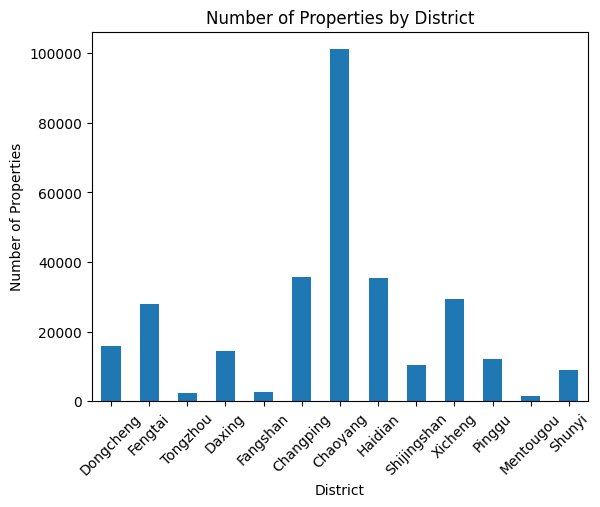

In [11]:
# 对district进行分组并计算每个区域的样本个数
district_counts = data.groupby('district').size()
# 绘制柱状图
district_counts.plot(kind='bar')

plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by District')
plt.xticks(range(len(district_counts)), ['Dongcheng', 'Fengtai', 'Tongzhou', 'Daxing', 'Fangshan', 'Changping', 'Chaoyang', 'Haidian', 'Shijingshan', 'Xicheng', 'Pinggu', 'Mentougou', 'Shunyi'], rotation=45)
plt.show()

In [12]:
# 我们分区块研究影响房价的显著因素
# 东城区
from folium.plugins import MarkerCluster
Dongcheng_data = data[data['district'] == 1]
map_center = [Dongcheng_data.iloc[0]['Lat'], Dongcheng_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 创建一个 MarkerCluster 对象
marker_cluster = MarkerCluster().add_to(m)
# 遍历为每个点添加标记到 MarkerCluster 中，而不是直接添加到地图上
for index, row in Dongcheng_data.iterrows():
    folium.Marker([row['Lat'], row['Lng']]).add_to(marker_cluster)
display(m)

In [13]:
from folium.plugins import HeatMap
# 东城区
# 我们先观察东城区的房产分布情况，总体分布比较均匀
Dongcheng_data = data[data['district'] == 1]
map_center = [Dongcheng_data.iloc[0]['Lat']-0.03, Dongcheng_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
heat_data = [[row['Lat'], row['Lng']] for index, row in Dongcheng_data.iterrows()]
# 创建热度图并添加到地图上，增加透明度
HeatMap(heat_data, blur=5, radius=8).add_to(m)
display(m)

In [14]:
# 我们再观察价格在地理空间中的分布情况
map_center = [Dongcheng_data.iloc[0]['Lat']-0.03, Dongcheng_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 权重设置为每个点的price
heat_data = [[row['Lat'], row['Lng'], row['price']] for index, row in Dongcheng_data.iterrows()]
# 创建热度图并添加到地图上，使用price作为权重
HeatMap(heat_data,blur=5, radius=8).add_to(m)
m

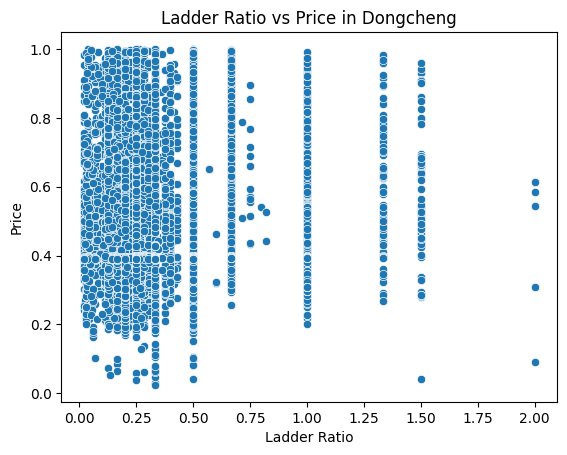

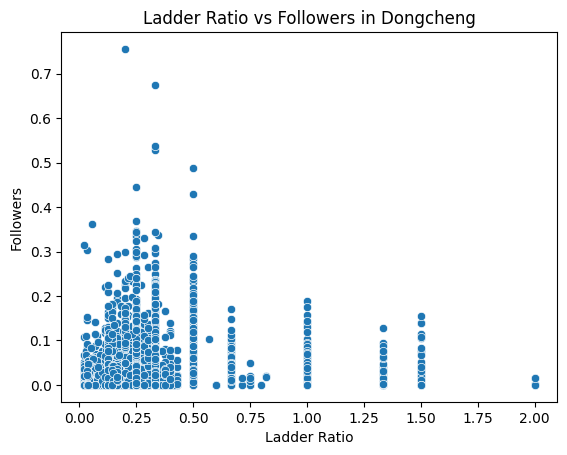

In [15]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
import seaborn as sns
# 使用Seaborn绘制ladderRatio与price的关系
sns.scatterplot(data=Dongcheng_data, x='ladderRatio', y='price')
plt.title('Ladder Ratio vs Price in Dongcheng')
plt.xlabel('Ladder Ratio')
plt.ylabel('Price')
plt.show()
# 使用Seaborn绘制ladderRatio与followers的关系
sns.scatterplot(data=Dongcheng_data, x='ladderRatio', y='followers')
plt.title('Ladder Ratio vs Followers in Dongcheng')
plt.xlabel('Ladder Ratio')
plt.ylabel('Followers')
plt.show()

In [16]:
# 计算ladderRatio, price和followers之间的相关系数
correlation_matrix = Dongcheng_data[['ladderRatio', 'price', 'followers']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 从相关系数的角度看ladderRatio在东城区不是一个显著影响房价的因素

             ladderRatio     price  followers
ladderRatio     1.000000  0.075023  -0.000950
price           0.075023  1.000000   0.302803
followers      -0.000950  0.302803   1.000000


In [17]:
# 我们再观察东城区的房价与楼层高度的关系
high_floor = Dongcheng_data[Dongcheng_data['floor'] > 10]
low_floor = Dongcheng_data[Dongcheng_data['floor'] <= 10]
print("东城区高层建筑共{high_floor}个，低层建筑共{low_floor}个,高层建筑占比为{high_floor_ratio:.2f}%".format(high_floor=len(high_floor), low_floor=len(low_floor), high_floor_ratio=len(high_floor)/len(Dongcheng_data)*100))

东城区高层建筑共8286个，低层建筑共7677个,高层建筑占比为51.91%


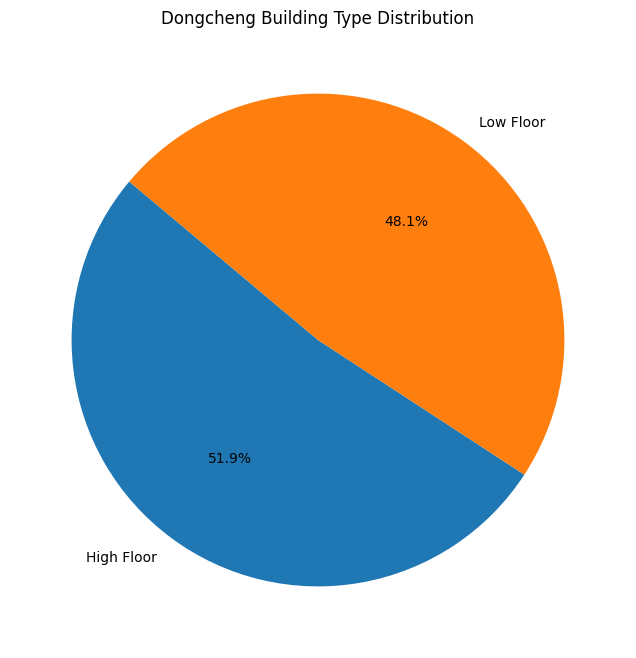

In [18]:
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie([len(high_floor), len(low_floor)], labels=['High Floor', 'Low Floor'], autopct='%1.1f%%', startangle=140)
plt.title('Dongcheng Building Type Distribution')
plt.show()

In [19]:
# 计算floor, price和followers之间的相关系数
correlation_matrix = Dongcheng_data[['floor', 'price', 'followers']].corr()
# 打印相关系数矩阵
print(correlation_matrix)

              floor     price  followers
floor      1.000000 -0.066087  -0.028260
price     -0.066087  1.000000   0.302803
followers -0.028260  0.302803   1.000000


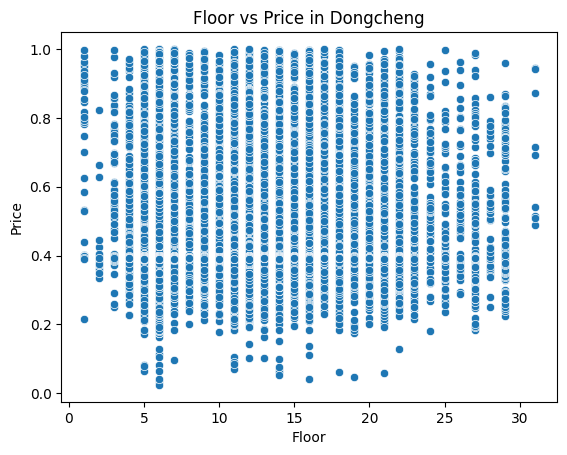

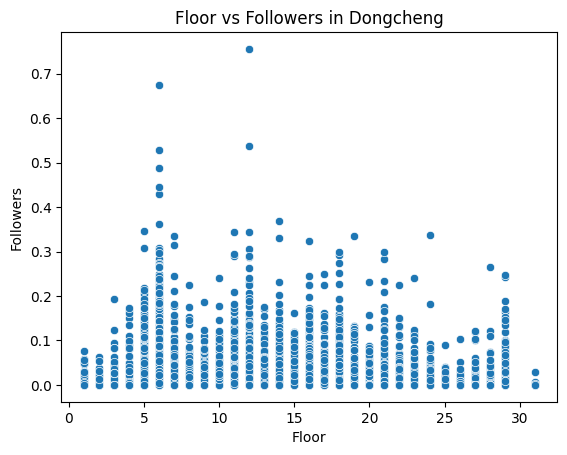

In [20]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
# 使用Seaborn绘制ladderRatio与price的关系
sns.scatterplot(data=Dongcheng_data, x='floor', y='price')
plt.title('Floor vs Price in Dongcheng')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()
# 使用Seaborn绘制ladderRatio与followers的关系
sns.scatterplot(data=Dongcheng_data, x='floor', y='followers')
plt.title('Floor vs Followers in Dongcheng')
plt.xlabel('Floor')
plt.ylabel('Followers')
plt.show()

In [21]:
# 发现在东城区中整体上floor和房屋的受欢迎程度没有关联
# 计算ladderRatio, price和followers之间的相关系数
correlation_matrix = high_floor[['ladderRatio', 'price', 'followers']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 可以发现对于高层建筑, ladderRatio和price之间的关联性也很弱

             ladderRatio     price  followers
ladderRatio     1.000000  0.099418  -0.003806
price           0.099418  1.000000   0.317012
followers      -0.003806  0.317012   1.000000


In [22]:
correlation_matrix = low_floor[['ladderRatio', 'price', 'followers']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 对于低层建筑, ladderRatio和price之间的关联性相较于高层建筑要更弱,虽然面对高层建筑时人们会考虑人均楼梯数目但总体来说不显著

             ladderRatio     price  followers
ladderRatio     1.000000  0.033315   0.001838
price           0.033315  1.000000   0.287442
followers       0.001838  0.287442   1.000000


In [23]:
correlation_matrix = low_floor[['communityAverage', 'price', 'followers']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 对于低层建筑, ladderRatio和price之间的关联性相较于高层建筑要更弱,虽然面对高层建筑时人们会考虑人均楼梯数目但总体来说不显著

                  communityAverage     price  followers
communityAverage          1.000000  0.264591  -0.096747
price                     0.264591  1.000000   0.287442
followers                -0.096747  0.287442   1.000000
